[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\\2023-10-10_New_diffs_architecture_workflow_weekly_EMEA_AMER.csv', 'C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\\Conducting_a_disciplinary_investigation.csv', 'C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\\ES2014a.Mix-Headset.csv', 'C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\\Social_Media_-_Harmed_Teens.csv']


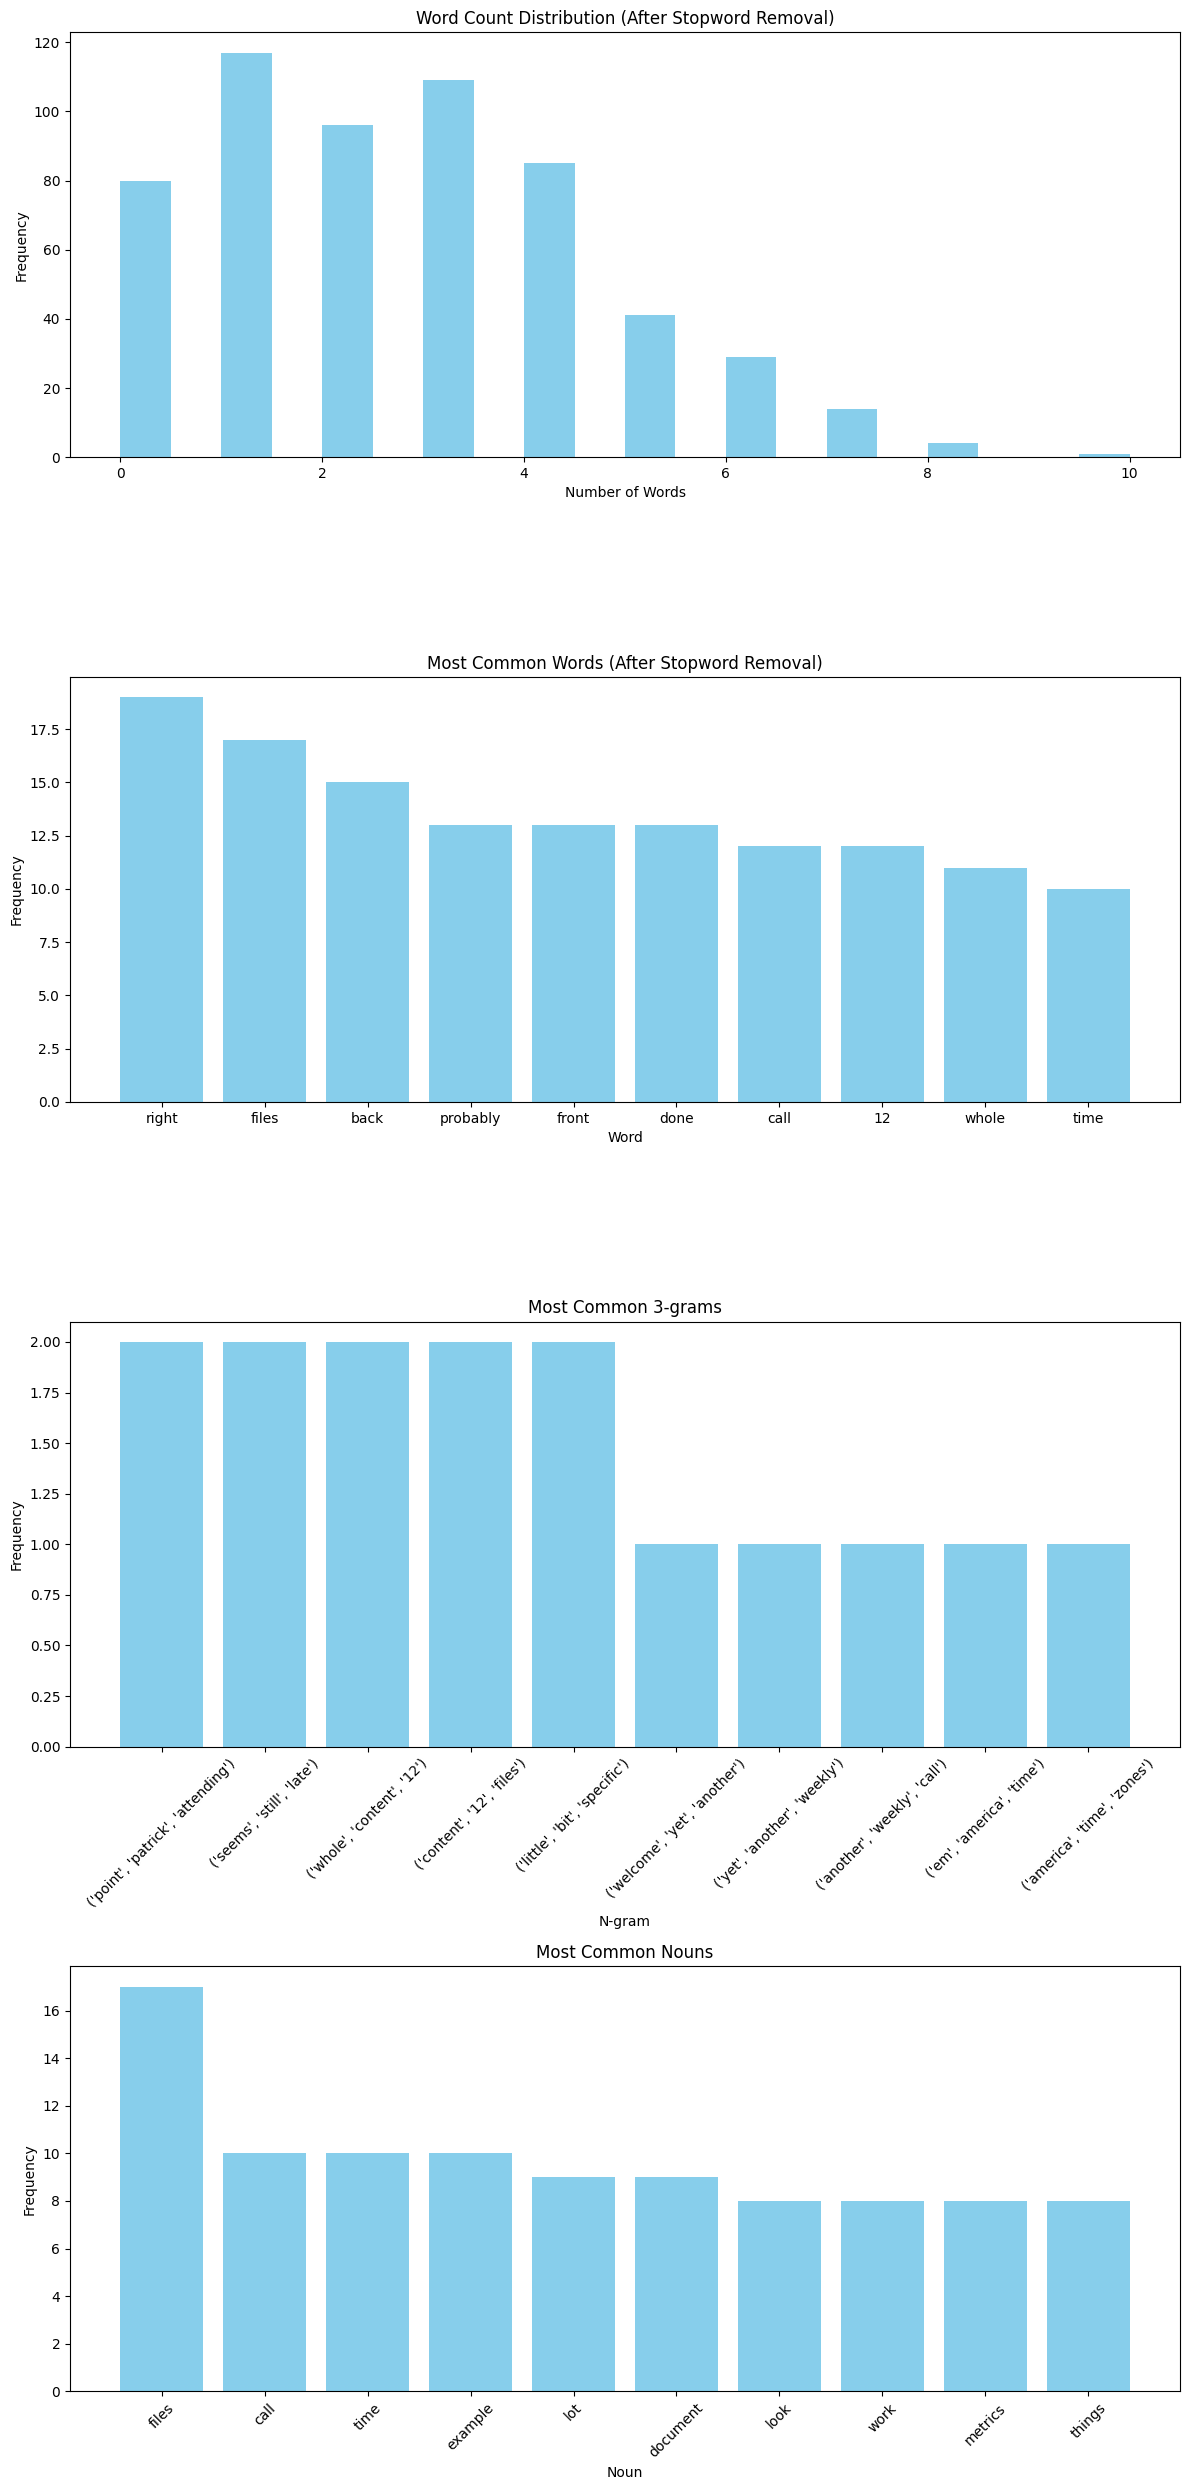

<Figure size 640x480 with 0 Axes>

Summary for C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\2023-10-10_New_diffs_architecture_workflow_weekly_EMEA_AMER.csv:
Total Transcripts: 576
Average Word Count: 2.595486111111111
Average Sentence Count: 0.4774305555555556


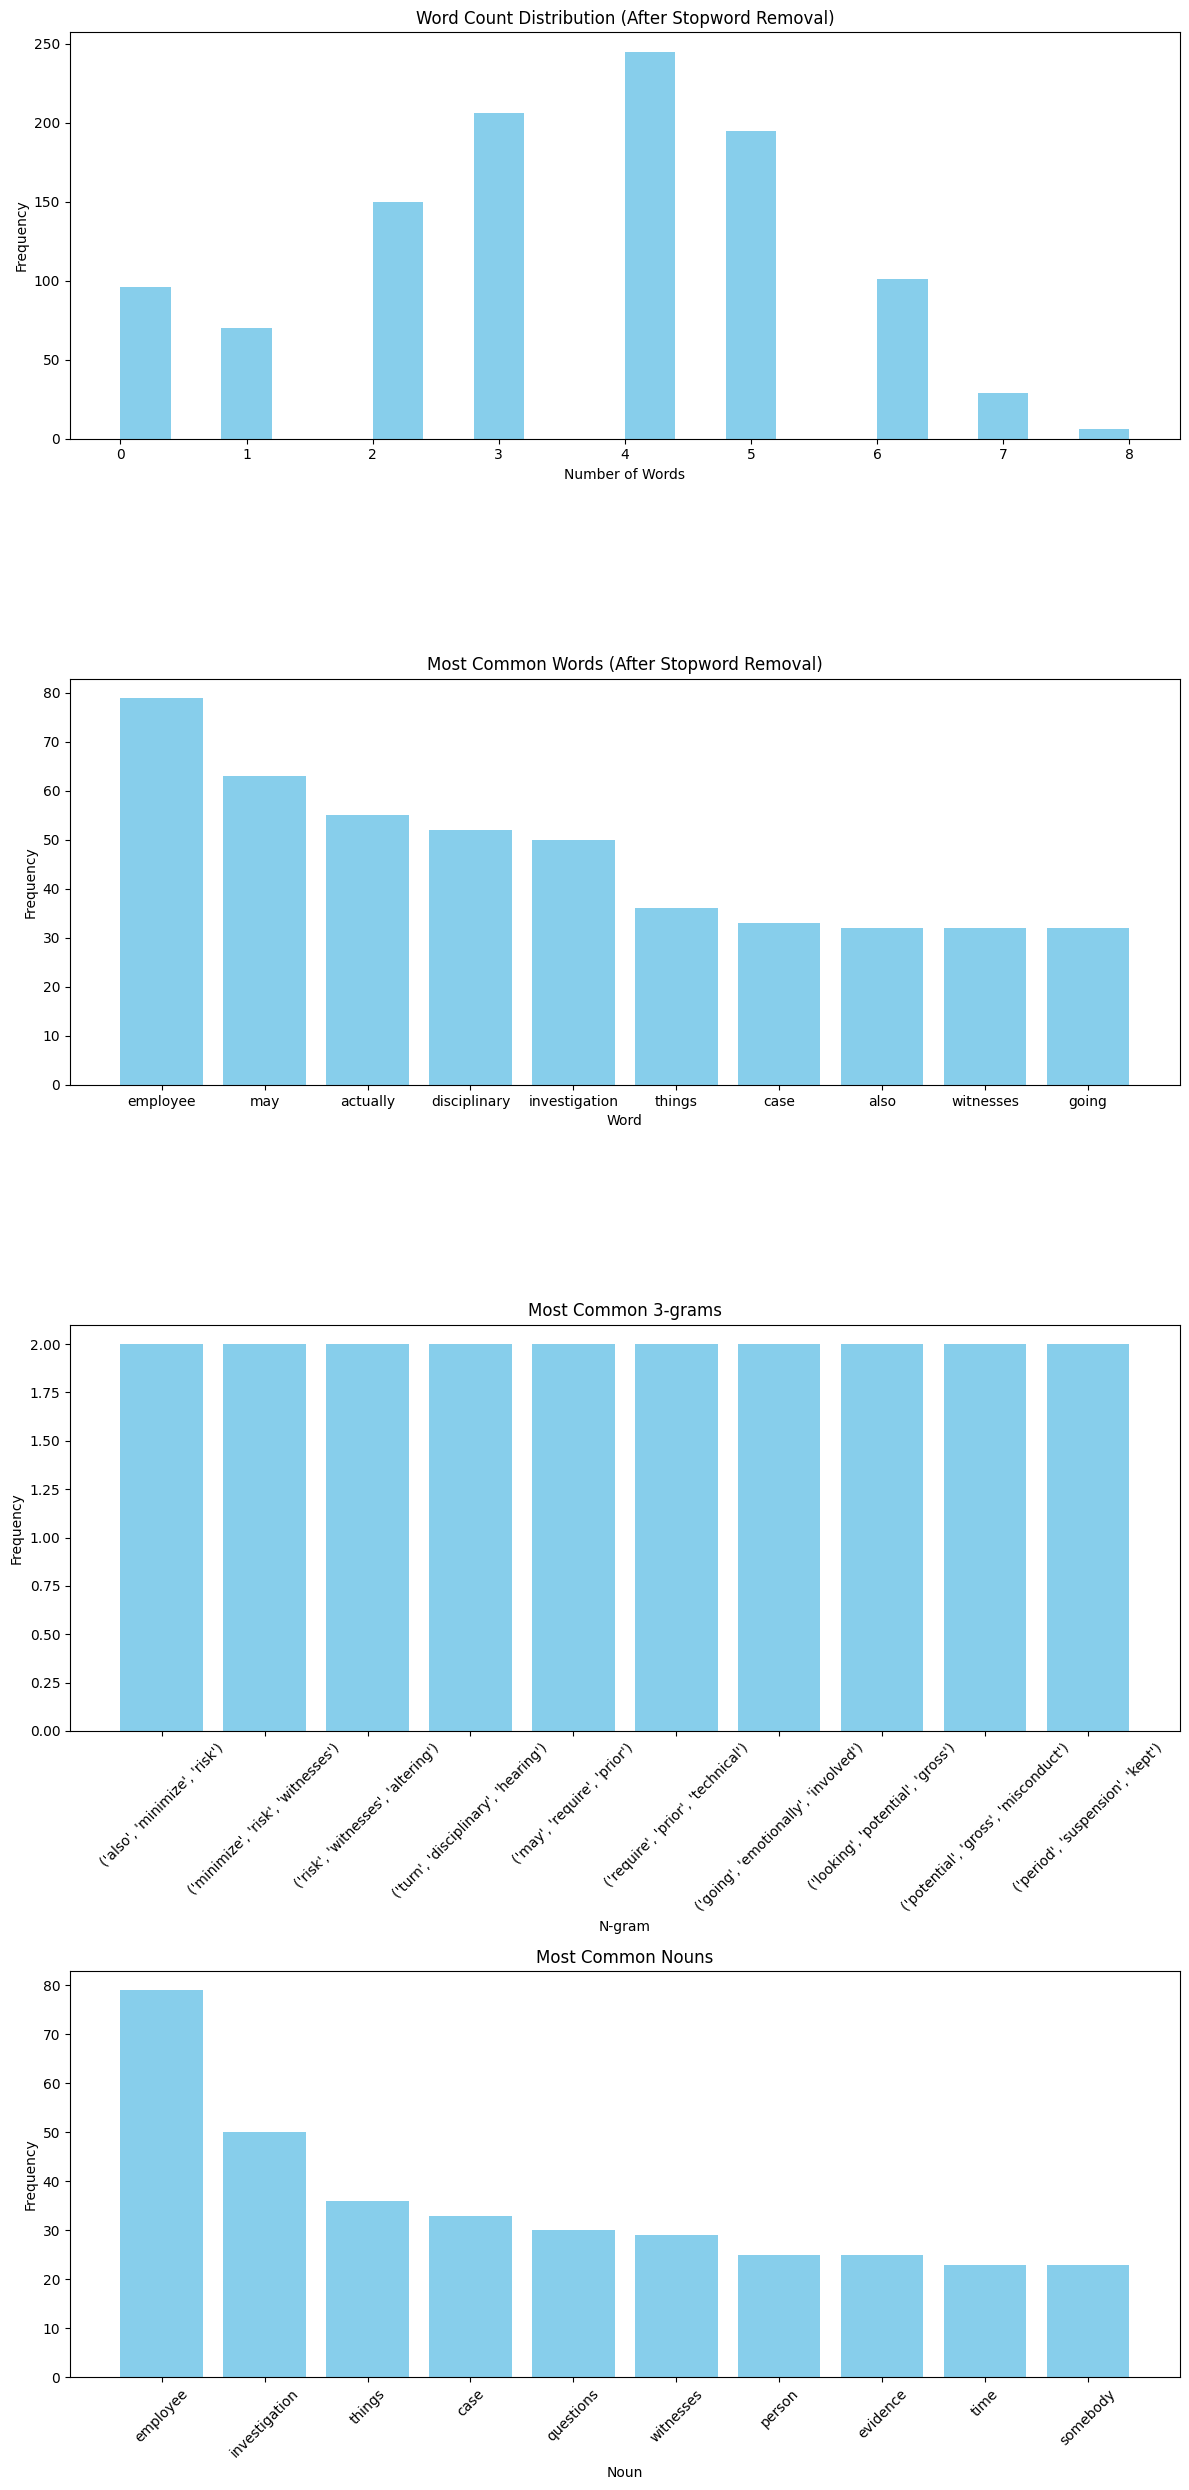

<Figure size 640x480 with 0 Axes>

Summary for C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\Conducting_a_disciplinary_investigation.csv:
Total Transcripts: 1098
Average Word Count: 3.4608378870673953
Average Sentence Count: 0.3542805100182149


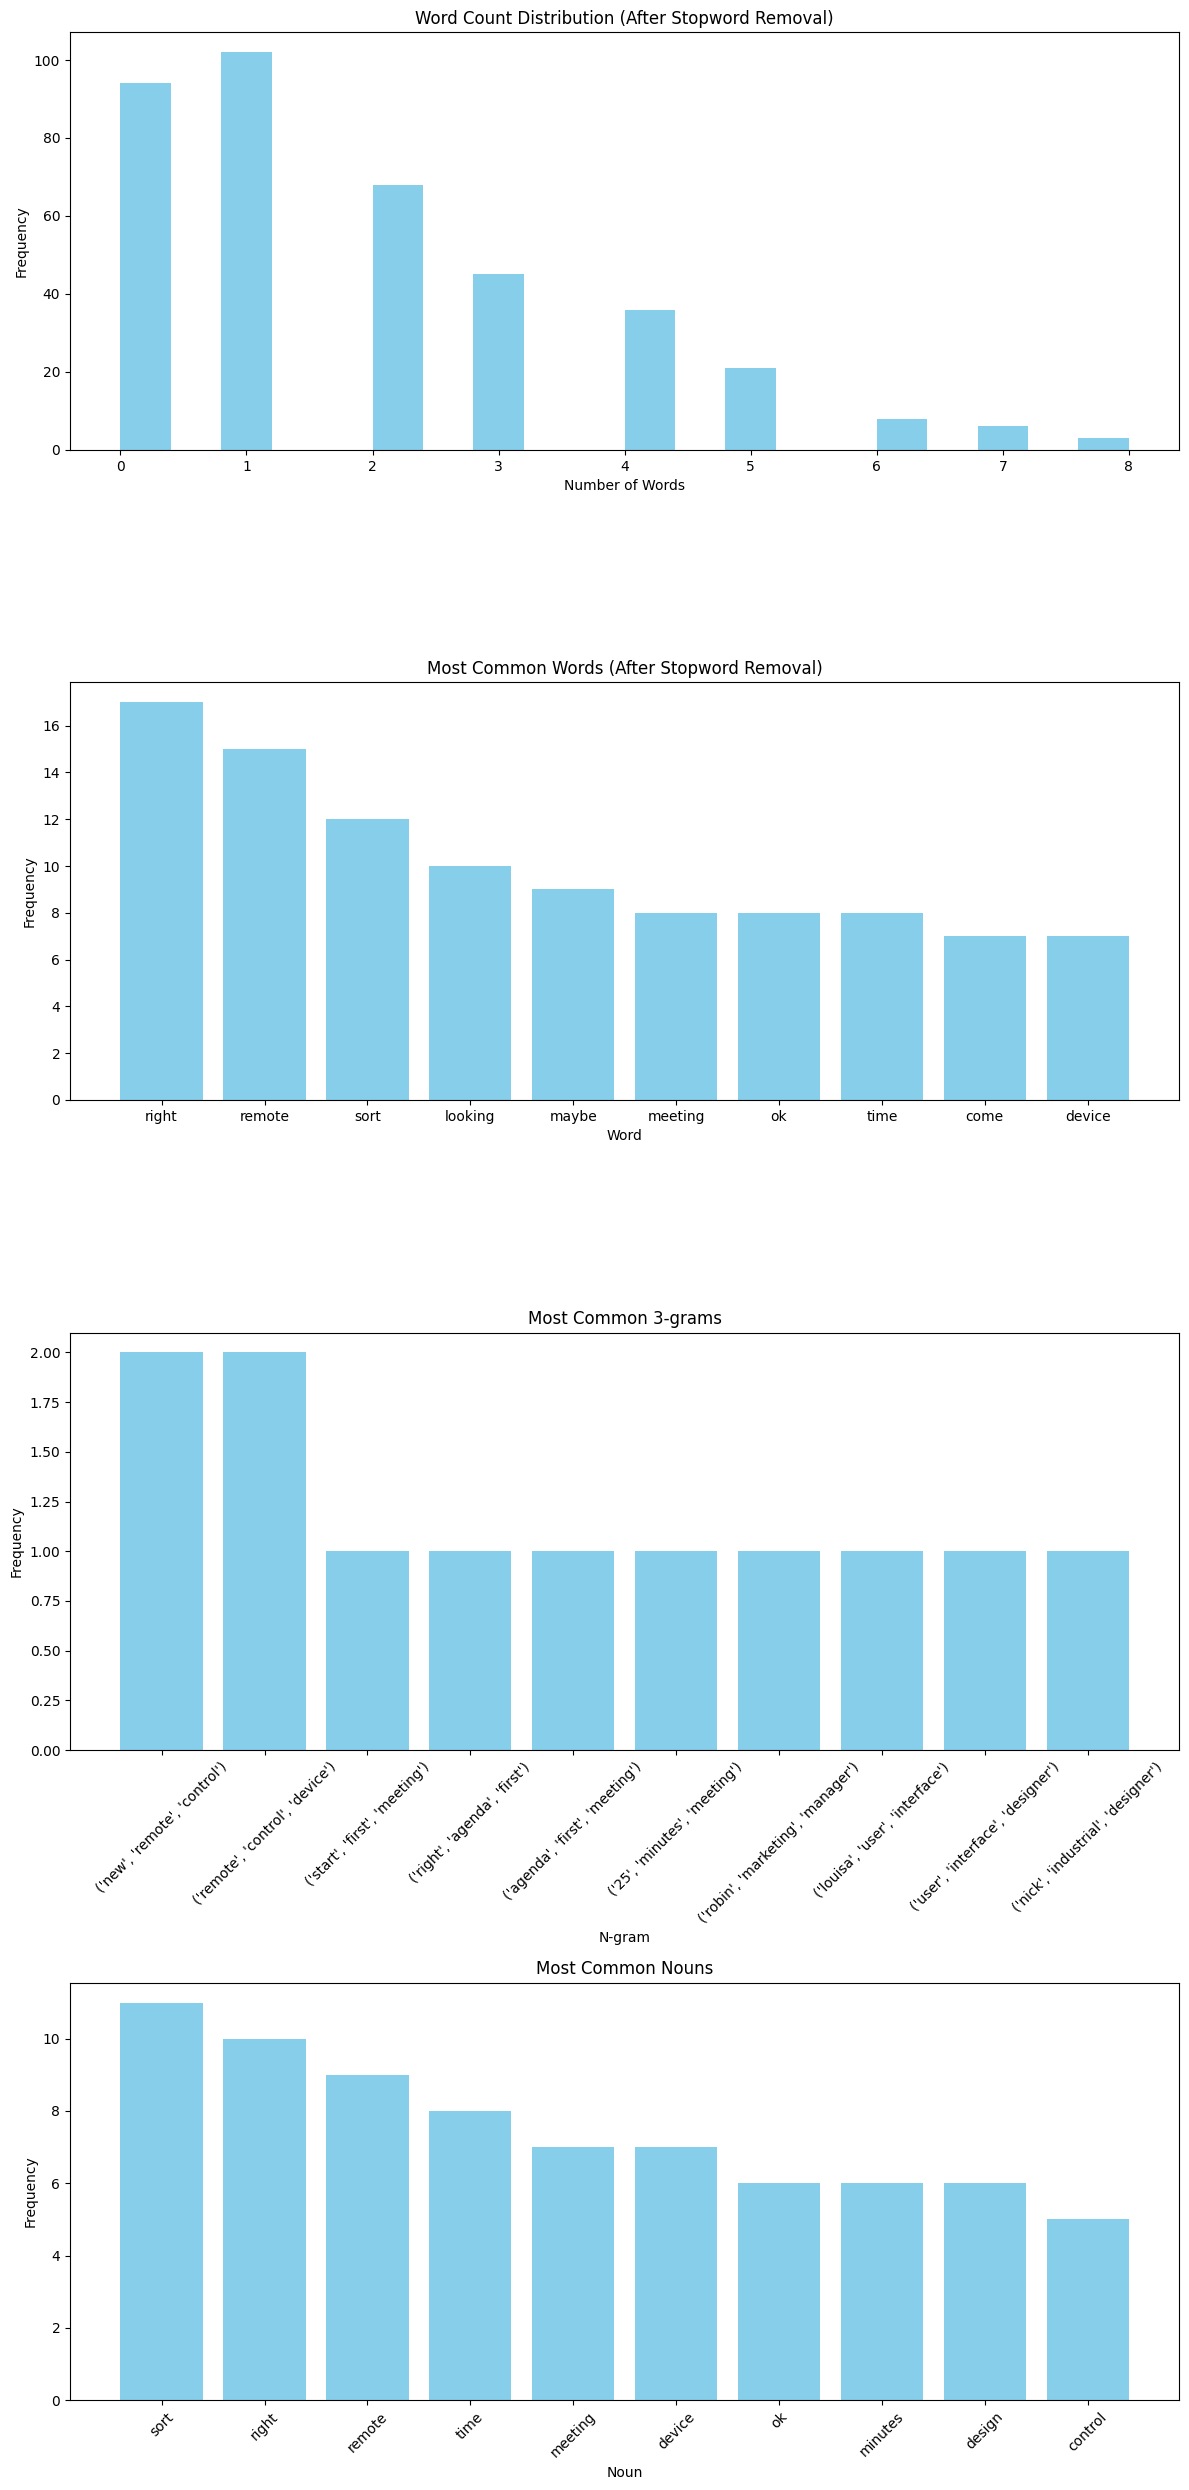

<Figure size 640x480 with 0 Axes>

Summary for C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\ES2014a.Mix-Headset.csv:
Total Transcripts: 383
Average Word Count: 1.9216710182767625
Average Sentence Count: 0.412532637075718


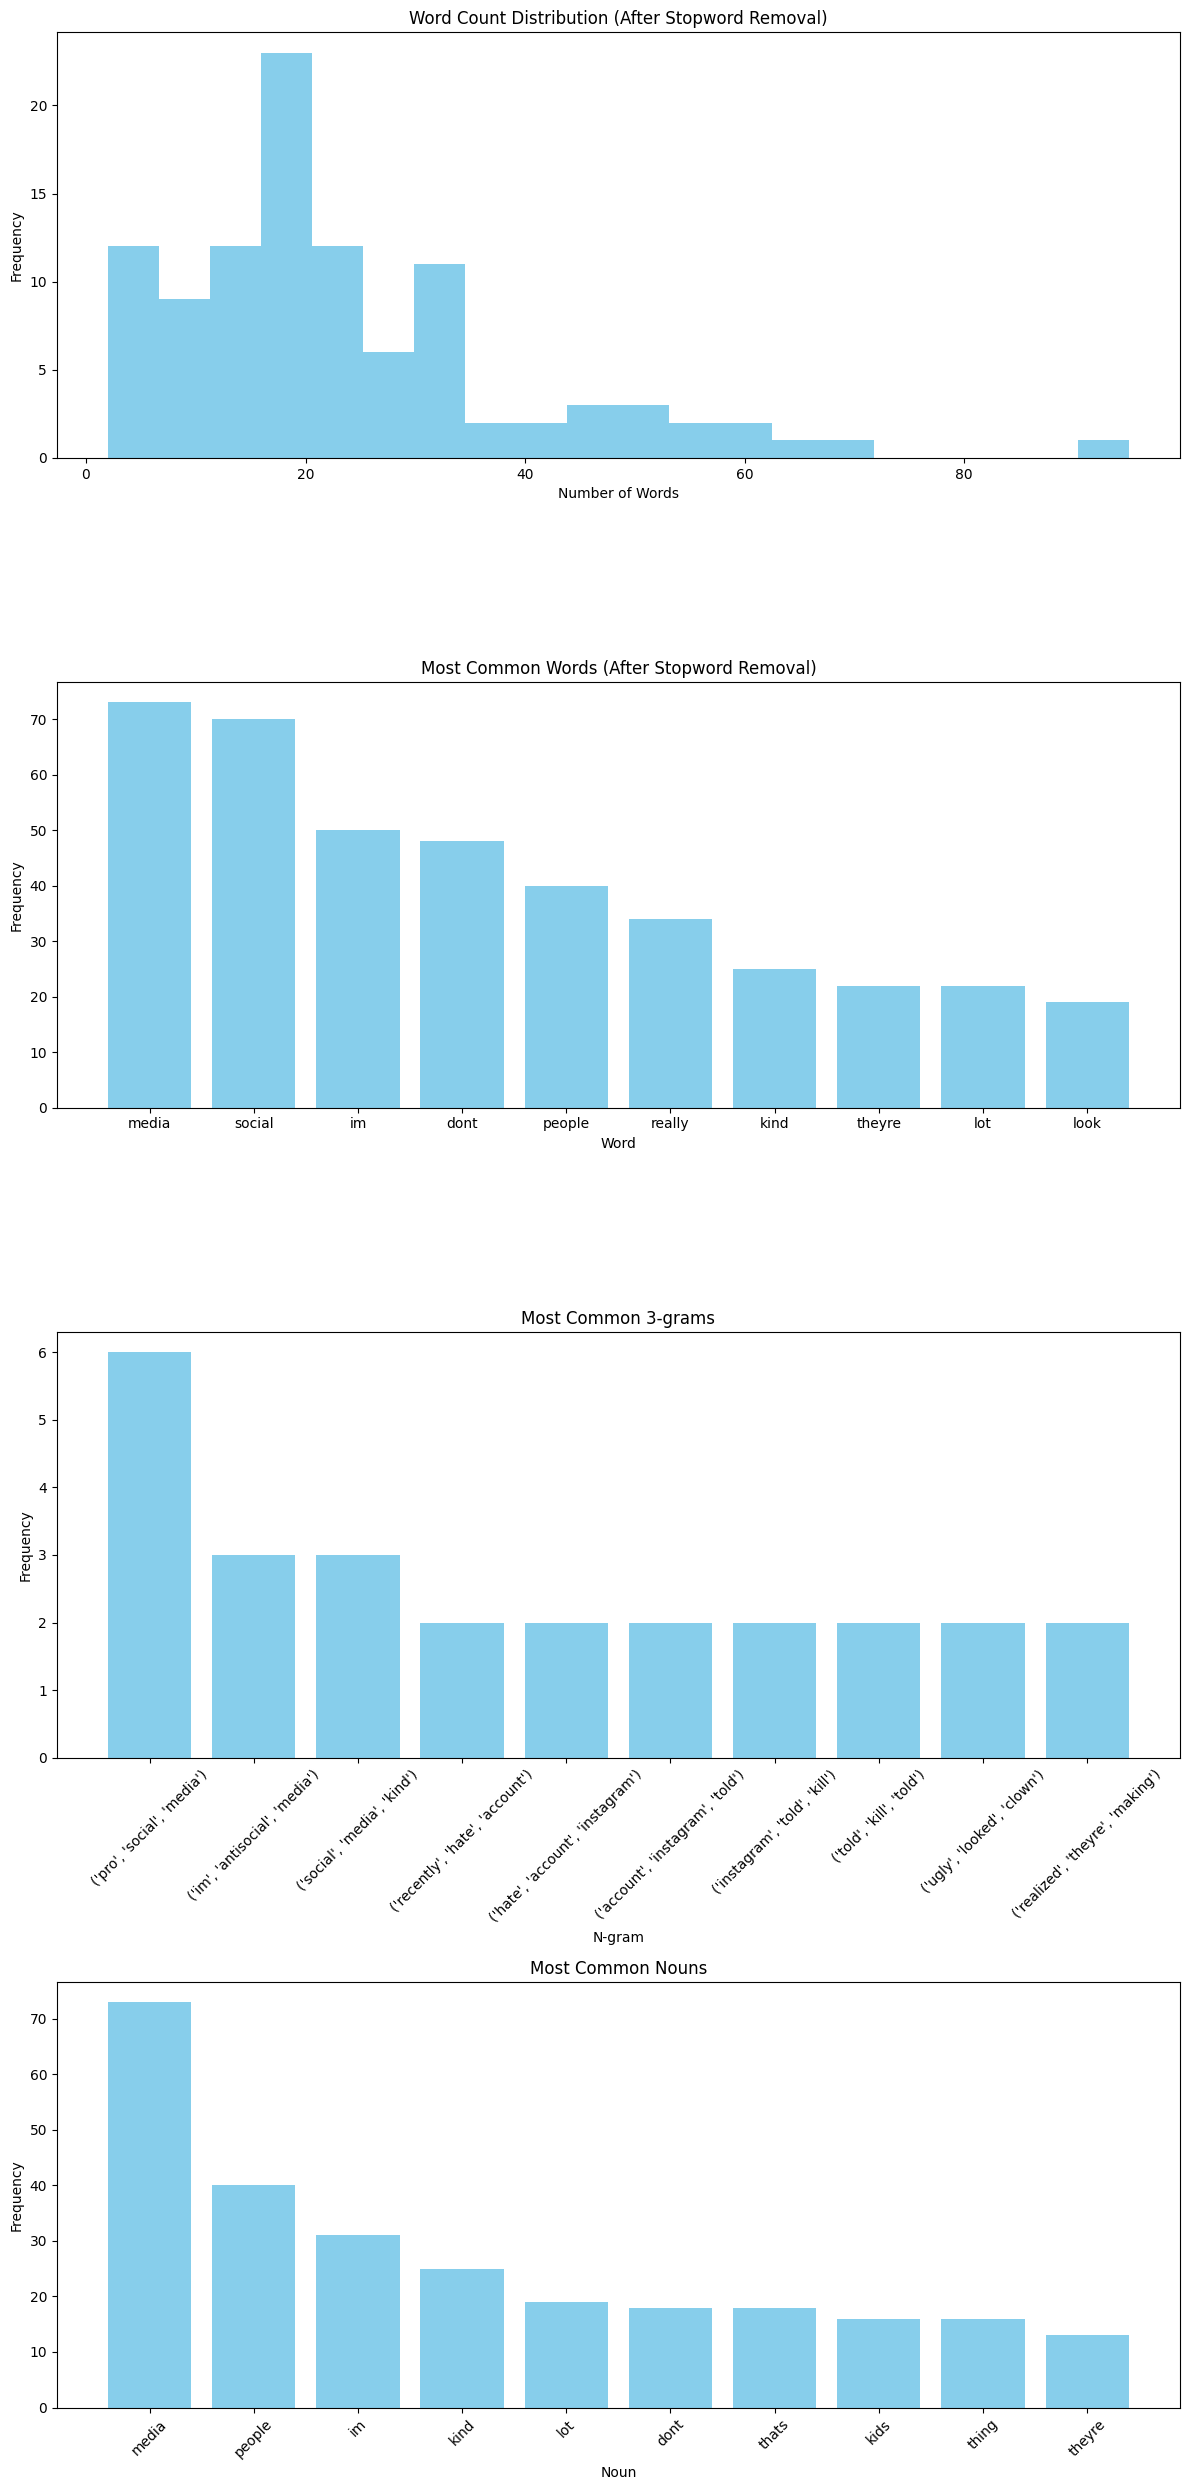

<Figure size 640x480 with 0 Axes>

Summary for C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\Social_Media_-_Harmed_Teens.csv:
Total Transcripts: 102
Average Word Count: 23.34313725490196
Average Sentence Count: 2.6862745098039214


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
from nltk import pos_tag


# Download stopwords corpus
nltk.download('stopwords')

# Additional words to remove
additional_stopwords = ['uh', 'um', 'yeah', 'na', 'one', 'could', 'would', 'end', 'like', 'well', 'okay', 'got', 'go', 'think', 'know', 'see', 'gon', 'want', 'cool', 'get', 'need']

# Combine NLTK stopwords with additional stopwords
stop_words = set(stopwords.words('english') + additional_stopwords)

# Path to the directory containing the CSV files
directory_path = 'C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset'

# Get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))
print(csv_files)

# Loop through each CSV file
for file in csv_files:
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Clean the text data
    df['cleaned_text'] = df['text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalnum() and word.lower() not in stop_words]))
    
    # Tokenization
    df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)
    
    # Calculate word count after removing stop words
    df['word_count_filtered'] = df['tokenized_text'].apply(len)
    
    # Basic Statistics
    df['sentence_count'] = df['text'].apply(lambda x: x.count('.'))
    df['average_sentence_length'] = df['word_count_filtered'] / df['sentence_count']
     
    # Part-of-speech tagging
    df['pos_tags'] = df['tokenized_text'].apply(pos_tag)
    
    # Extract nouns
    df['nouns'] = df['pos_tags'].apply(lambda x: [word for word, pos in x if pos.startswith('N')])
    
    # Flatten the list of nouns
    all_nouns = [noun for nouns in df['nouns'] for noun in nouns]
    
    # Count the frequency of each noun
    noun_freq = Counter(all_nouns)
    common_nouns = noun_freq.most_common(10)
    

    # Word Frequency Analysis
    all_words = [word for tokens in df['tokenized_text'] for word in tokens]
    n = 3  # Change n to desired n-gram length
    n_grams = [ngram for tokens in df['tokenized_text'] for ngram in list(ngrams(tokens, n))]
    common_ngrams = Counter(n_grams).most_common(10)
    common_words = Counter(all_words).most_common(10)
    
    # Visualizations
    plt.figure(figsize=(12, 25))
    
    plt.subplot(4, 1, 1)
    plt.hist(df['word_count_filtered'], bins=20, color='skyblue')
    plt.title('Word Count Distribution (After Stopword Removal)')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    
    plt.subplot(4, 1, 2)
    plt.bar(*zip(*common_words), color='skyblue')
    plt.title('Most Common Words (After Stopword Removal)')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
  
    plt.subplot(4, 1, 3)
    ngram_labels, ngram_counts = zip(*common_ngrams)
    plt.bar(range(len(ngram_labels)), ngram_counts, color='skyblue')
    plt.xticks(range(len(ngram_labels)), ngram_labels, rotation=45)
    plt.title(f'Most Common {n}-grams')
    plt.xlabel('N-gram')
    plt.ylabel('Frequency')
        # Plotting
    
    plt.subplot(4, 1, 4)
    plt.bar(*zip(*common_nouns), color='skyblue')
    plt.title('Most Common Nouns')
    plt.xlabel('Noun')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.tight_layout()
    plt.show()  # Display the graphs

    
    # Summary
    print(f"Summary for {file}:")
    print(f"Total Transcripts: {len(df)}")
    print(f"Average Word Count: {df['word_count_filtered'].mean()}")
    print(f"Average Sentence Count: {df['sentence_count'].mean()}")
    


['C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\\2023-09-26_Architecture_Design_Workflow_New_Diffs_kickoff_call.csv', 'C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\\Conducting_a_disciplinary_investigation.csv', 'C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\\ES2014a.Mix-Headset.csv', 'C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset\\Social_Media_-_Harmed_Teens.csv']


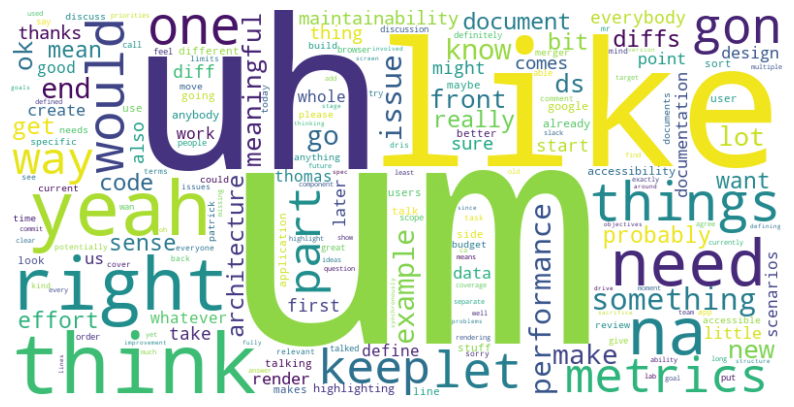

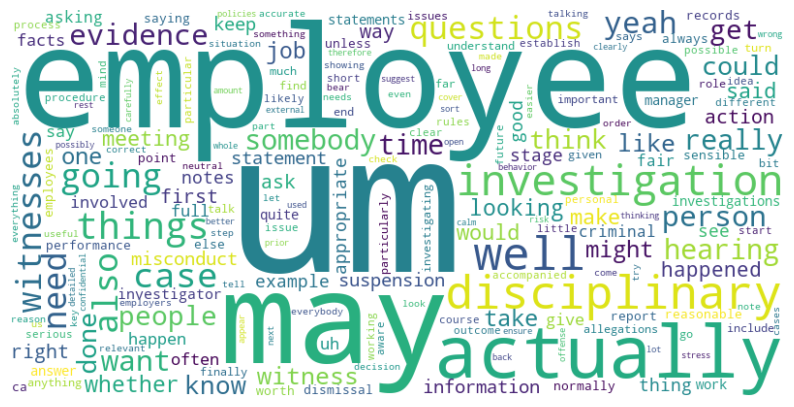

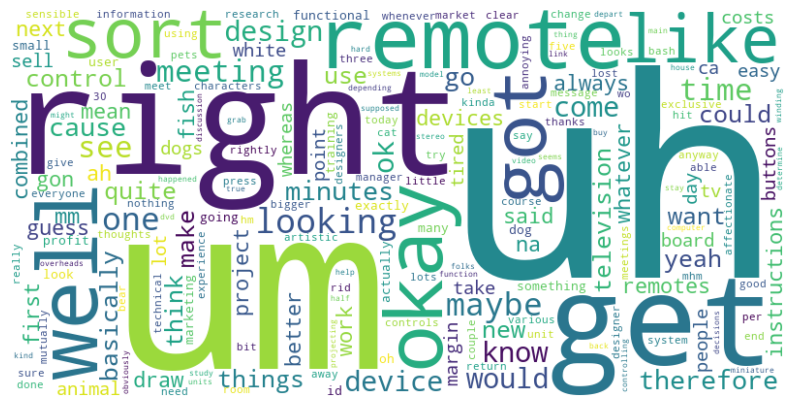

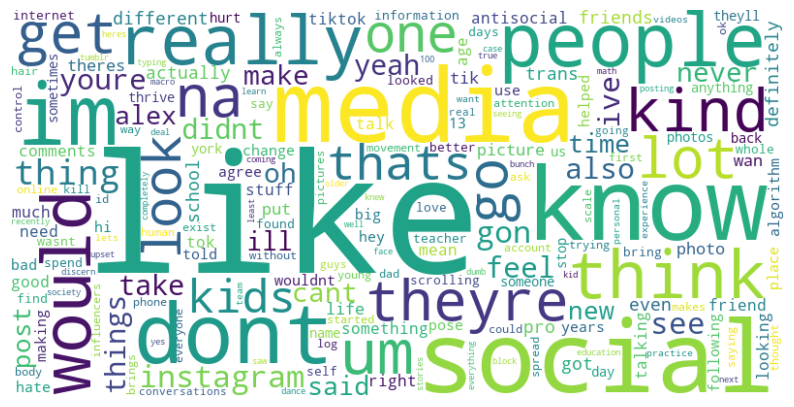

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Path to the directory containing the CSV files
directory_path = 'C:/Users/madhu/Desktop/SeattleUniversity/capstone/resonate_madhu/Resonate/Notebooks/Transcript-Dataset'

# Get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))
print(csv_files)
# Loop through each CSV file
for file in csv_files:
# Load your transcript CSV file into a DataFrame
    df = pd.read_csv(file)

# Combine all text into a single string
    text = ' '.join(df['text'].tolist())

# Tokenize the text
    tokens = word_tokenize(text)

# Remove stopwords
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stopwords.words('english')]

# Create a frequency distribution of words
    word_freq = pd.Series(filtered_tokens).value_counts().to_dict()

# Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)

# Display the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


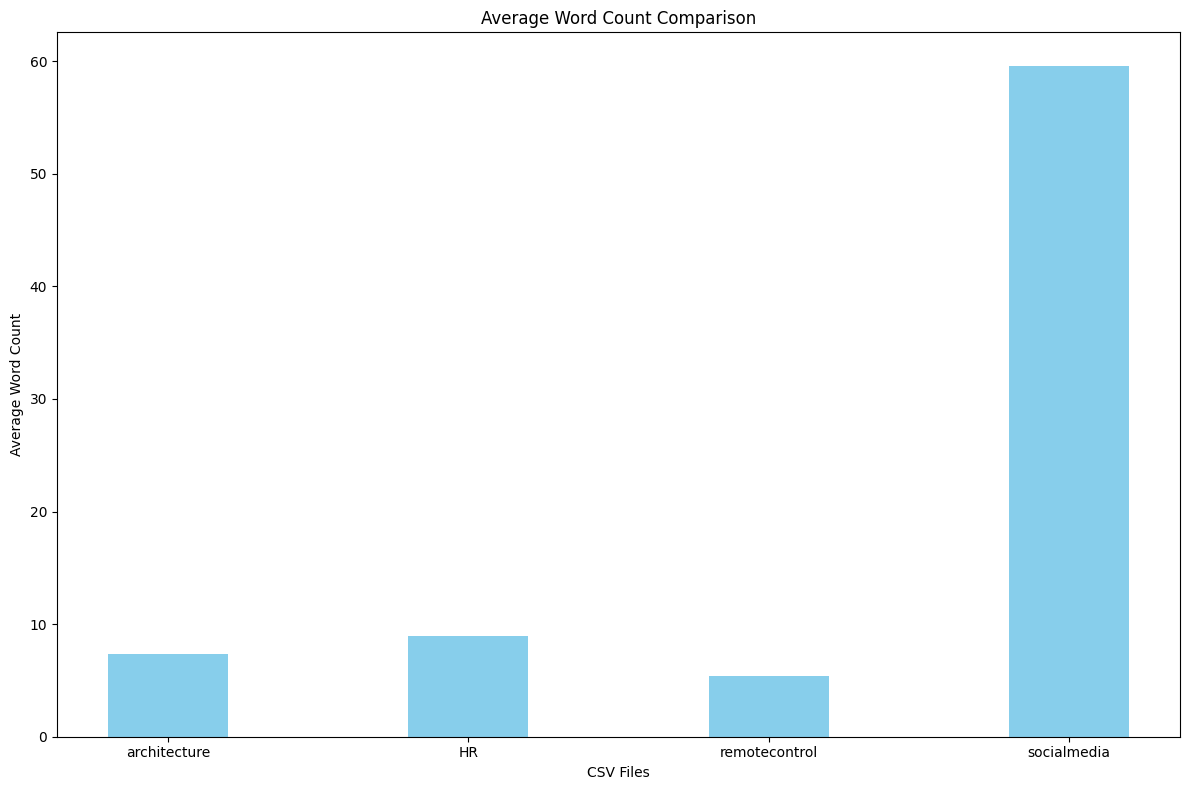

In [23]:

# Lists to store average word counts and average sentence counts
avg_word_counts = []
avg_sentence_counts = []
# Loop through each CSV file
for file in csv_files:
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Clean the text data
    df['cleaned_text'] = df['text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalnum()]))
    
    # Tokenization
    df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)
    
    # Calculate average word count and average sentence count
    avg_word_count = df['tokenized_text'].apply(len).mean()
    avg_sentence_count = df['text'].apply(lambda x: x.count('.')).mean()
    
    # Append to the lists
    avg_word_counts.append(avg_word_count)
    avg_sentence_counts.append(avg_sentence_count)
xtick=["architecture",'HR','remotecontrol','socialmedia']
# Create a bar graph to compare average word counts
plt.figure(figsize=(12, 8))
plt.bar(range(len(csv_files)), avg_word_counts, color='skyblue',width=0.4)
plt.xticks(range(len(csv_files)), [file for file in xtick])
plt.xlabel('CSV Files')
plt.ylabel('Average Word Count')
plt.title('Average Word Count Comparison')
plt.tight_layout()
plt.show()